<a href="https://colab.research.google.com/github/plue1011/PyTorch/blob/master/practice/function_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optimizers
from torch.utils.data import TensorDataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [0]:
def f(x):
    return x * np.sin(x**2)

In [0]:
x = np.arange(-3, 3, 0.1)
t = f(x)

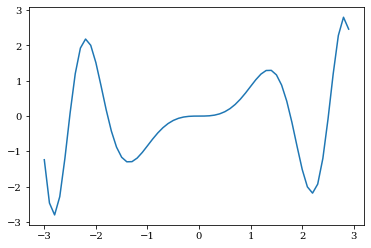

In [274]:
plt.plot(x, t)

In [0]:
x_tensor = torch.Tensor(x.reshape(len(x), 1)).to(device)
t_tensor = torch.Tensor(t.reshape(len(t), 1)).to(device)

# 活性化関数：線形関数

In [0]:
# モデルの構築
class NN(nn.Module):
    def __init__(self, hidden_dim):
        super(NN, self).__init__()
        self.l1 = nn.Linear(1, hidden_dim)
        self.l2 = nn.Linear(hidden_dim, hidden_dim)
        self.l3 = nn.Linear(hidden_dim, hidden_dim)
        self.l4 = nn.Linear(hidden_dim, 1)

        self.layers = [self.l1, self.l2, self.l3, self.l4]

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

hidden_dim = 4  # 中間層の次元数(中間層のニューロン数)

## モデルの構築
model = NN(hidden_dim).to(device)

In [277]:
# 誤差関数の定義
compute_loss = nn.MSELoss(reduction="sum")

# 最適化手法の定義
optimizer = optimizers.Adam(model.parameters(),
                            lr=0.001,
                            betas=(0.9, 0.999), 
                            amsgrad=True)

# モデルの学習
## 1ステップ分の訓練のための関数
def train_step(x, t):
    model.train()  # モデルを訓練モードに設定する
    preds = model(x)  # modelにxを代入して、予測させる
    loss = compute_loss(preds, t)  # 予測値と正解との誤差を求める
    optimizer.zero_grad()  # 勾配を初期化する
    loss.backward()  # 勾配を計算する
    optimizer.step()  # パラメータを更新する
    return loss, preds

# 学習
## 設定
epochs = 10000  # エポック数を設定する

np.random.seed(123)
torch.manual_seed(123)

hist = {'loss': []}

## モデルの学習
for epoch in range(epochs):
    loss, preds = train_step(x_tensor, t_tensor)
    train_loss = loss.item()
    hist['loss'].append(train_loss)
    if epoch % 1000 == 0:
        print('epoch: {}, loss: {:.3}'.format(epoch+1, train_loss))

epoch: 1, loss: 92.3
epoch: 1001, loss: 89.7
epoch: 2001, loss: 89.7
epoch: 3001, loss: 89.7
epoch: 4001, loss: 89.7
epoch: 5001, loss: 89.7
epoch: 6001, loss: 89.7
epoch: 7001, loss: 89.7
epoch: 8001, loss: 89.7
epoch: 9001, loss: 89.7


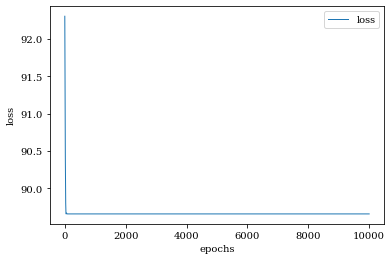

In [278]:
loss = hist['loss']

fig = plt.figure()
plt.rc('font', family='serif')
plt.plot(range(len(loss)), loss, linewidth=1,
             label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
model.eval()
y_tensor = model(x_tensor)
y = y_tensor.data.cpu().numpy().reshape(-1, )

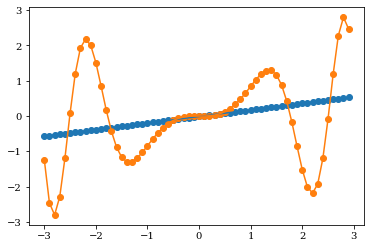

In [280]:
plt.scatter(x, y)
plt.scatter(x, t)
plt.plot(x, y)
plt.plot(x, t)

# 活性関数：非線形関数

In [0]:
# モデルの構築
class NN(nn.Module):
    def __init__(self, hidden_dim):
        super(NN, self).__init__()
        self.l1 = nn.Linear(1, hidden_dim)
        self.l2 = nn.Linear(hidden_dim, hidden_dim)
        self.l3 = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = self.l3(x)
        return x

hidden_dim = 50  # 中間層の次元数(中間層のニューロン数)

## モデルの構築
model = NN(hidden_dim).to(device)

In [282]:
# 誤差関数の定義
compute_loss = nn.MSELoss(reduction="sum")

# 最適化手法の定義
optimizer = optimizers.Adam(model.parameters(),
                            lr=0.001,
                            betas=(0.9, 0.999), 
                            amsgrad=True)

# モデルの学習
## 1ステップ分の訓練のための関数
def train_step(x, t):
    model.train()  # モデルを訓練モードに設定する
    preds = model(x)  # modelにxを代入して、予測させる
    loss = compute_loss(preds, t)  # 予測値と正解との誤差を求める
    optimizer.zero_grad()  # 勾配を初期化する
    loss.backward()  # 勾配を計算する
    optimizer.step()  # パラメータを更新する
    return loss, preds

# 学習
## 設定
epochs = 10000  # エポック数を設定する

np.random.seed(123)
torch.manual_seed(123)

hist = {'loss': []}

## モデルの学習
for epoch in range(epochs):
    loss, preds = train_step(x_tensor, t_tensor)
    train_loss = loss.item()
    hist['loss'].append(train_loss)
    if epoch % 1000 == 0:
        print('epoch: {}, loss: {:.3}'.format(epoch+1, train_loss))

epoch: 1, loss: 95.5
epoch: 1001, loss: 6.25
epoch: 2001, loss: 3.25
epoch: 3001, loss: 2.03
epoch: 4001, loss: 1.74
epoch: 5001, loss: 1.67
epoch: 6001, loss: 1.63
epoch: 7001, loss: 1.66
epoch: 8001, loss: 1.67
epoch: 9001, loss: 1.59


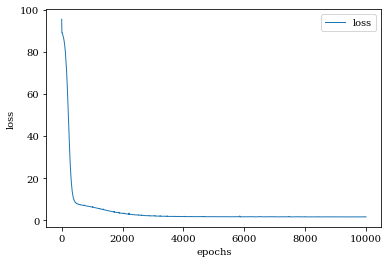

In [283]:
loss = hist['loss']

fig = plt.figure()
plt.rc('font', family='serif')
plt.plot(range(len(loss)), loss, linewidth=1,
             label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
model.eval()
y_tensor = model(x_tensor)
y = y_tensor.data.cpu().numpy().reshape(-1, )

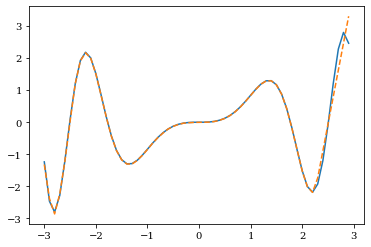

In [287]:
plt.plot(x, t)
plt.plot(x, y, linestyle="--")